In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("data/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

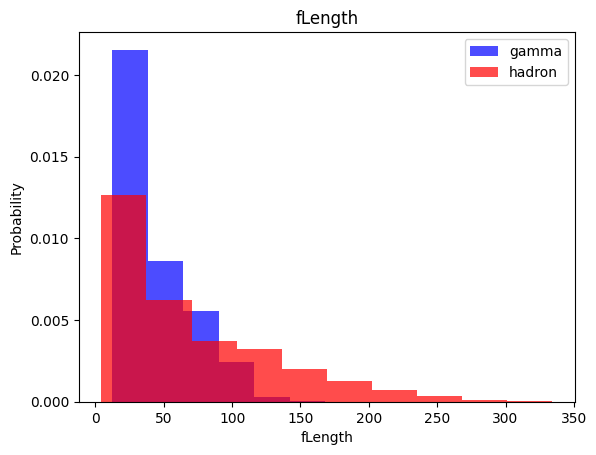

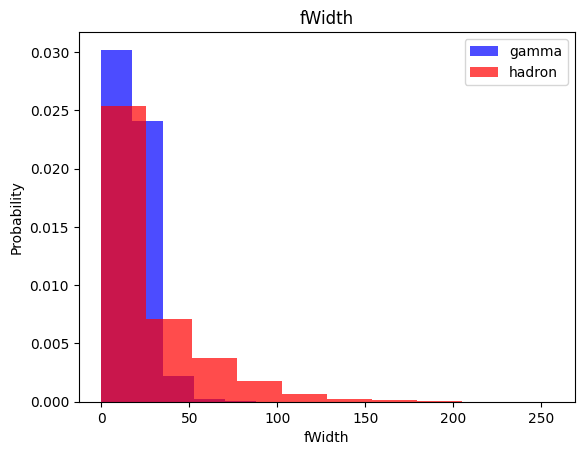

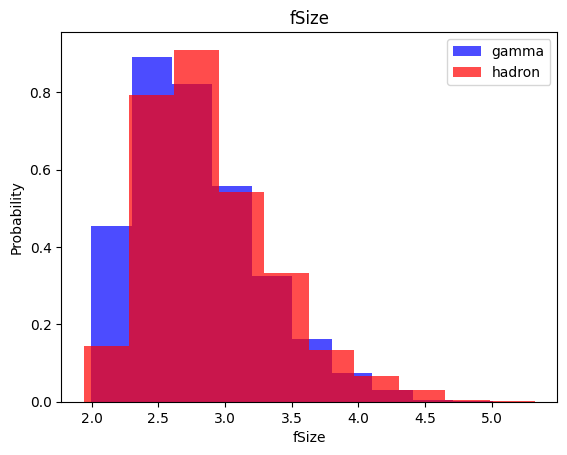

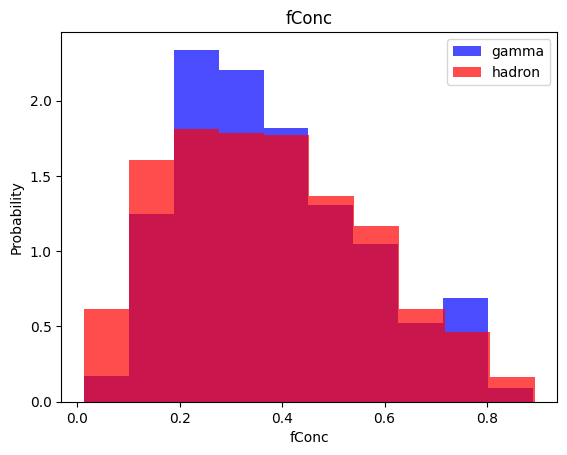

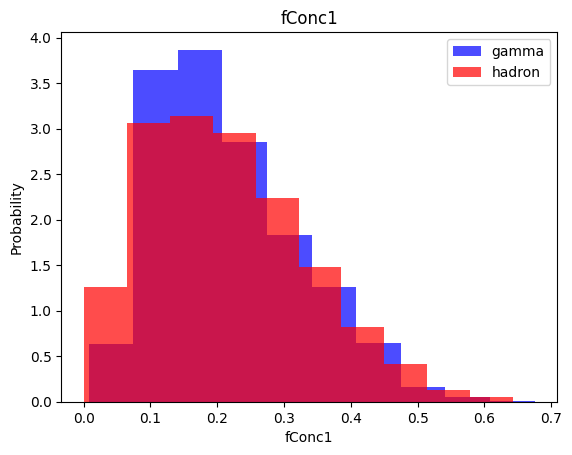

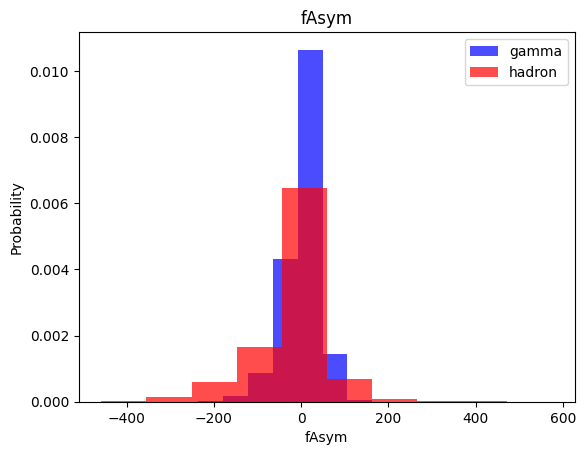

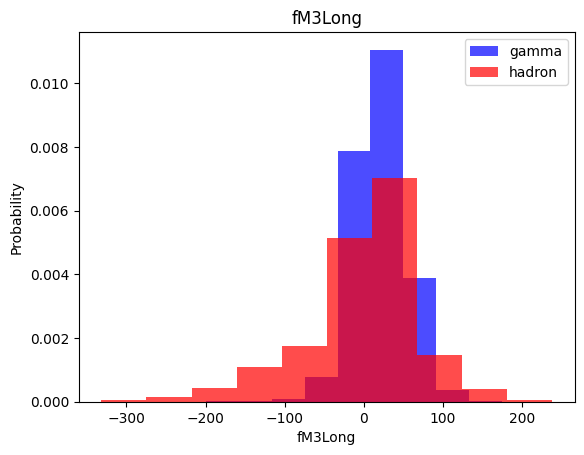

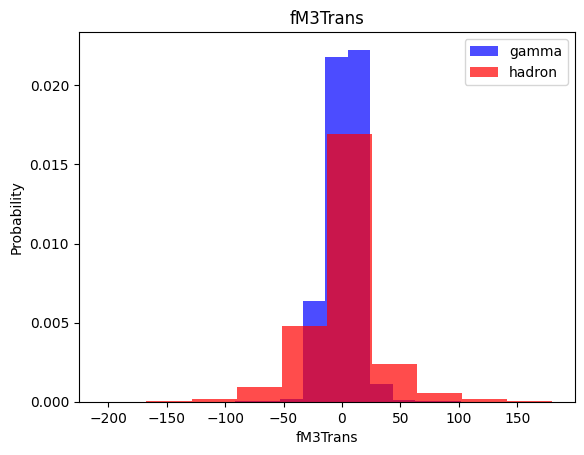

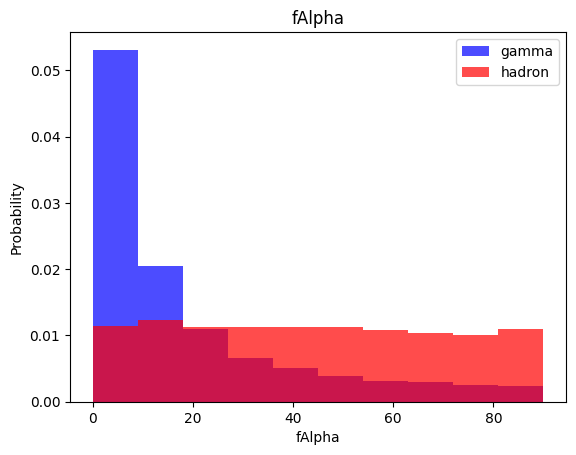

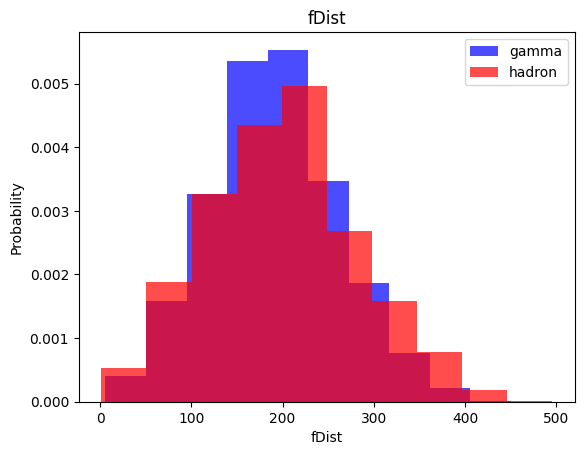

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1370
           1       0.84      0.87      0.85      2434

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1370
           1       0.73      0.91      0.81      2434

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Log Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1370
           1       0.84      0.82      0.83      2434

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1370
           1       0.89      0.91      0.90      2434

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net

In [25]:
import tensorflow as tf

In [26]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [27]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


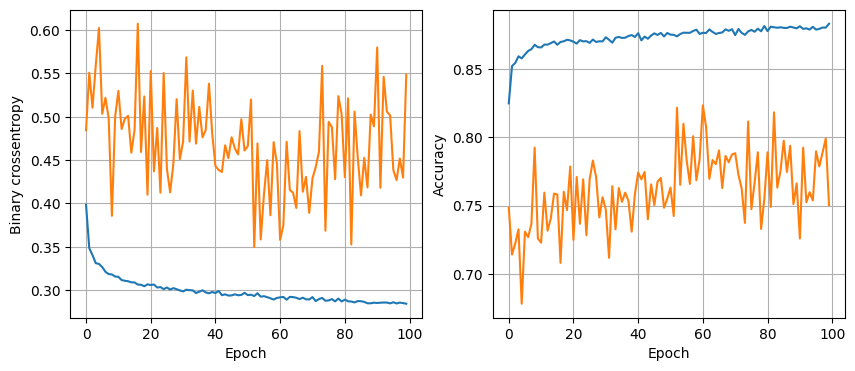

119/119 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.01, batch size 64


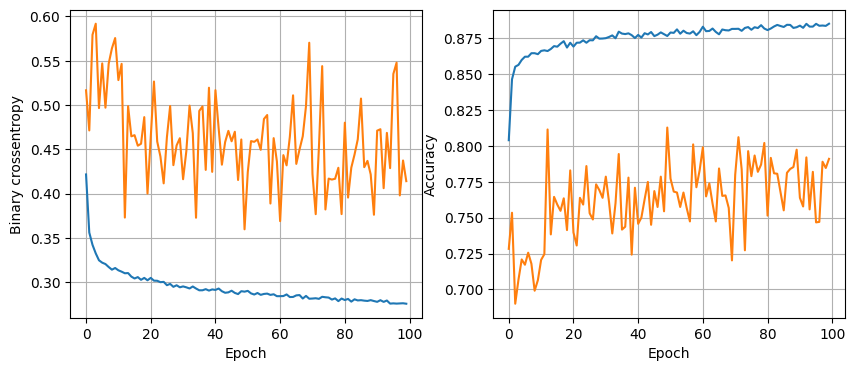

119/119 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8636
16 nodes, dropout 0, lr 0.01, batch size 128


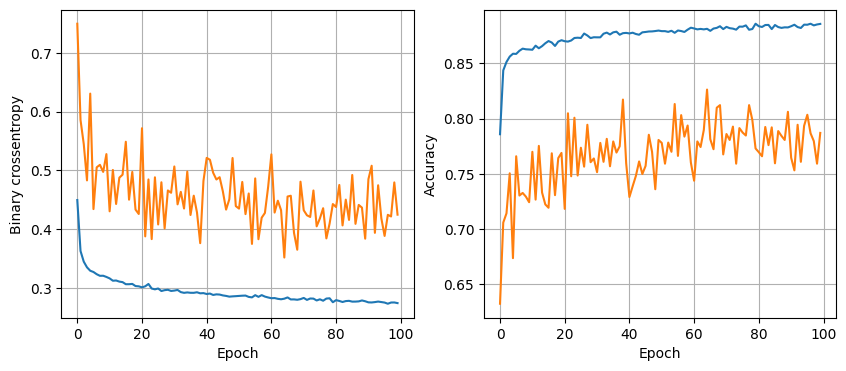

119/119 [==============================] - 1s 4ms/step - loss: 0.3209 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 32


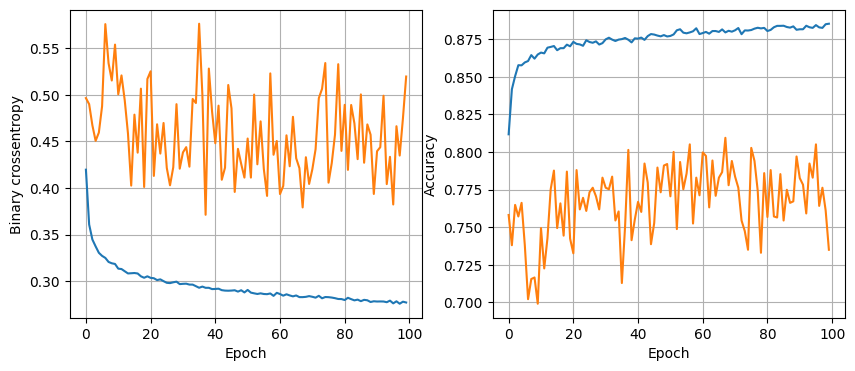

119/119 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8651
16 nodes, dropout 0, lr 0.005, batch size 64


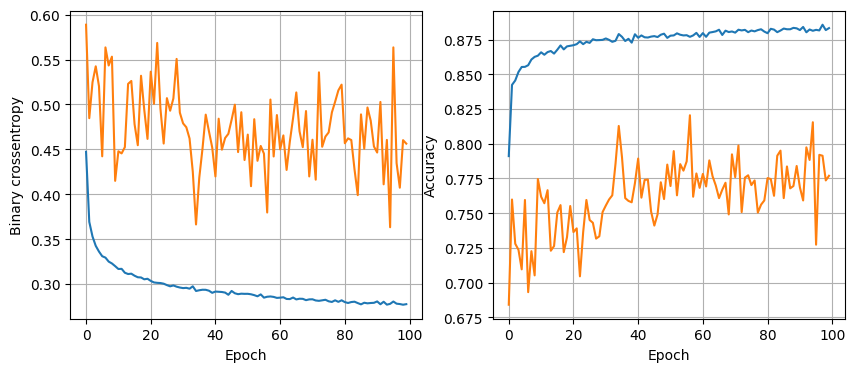

119/119 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.005, batch size 128


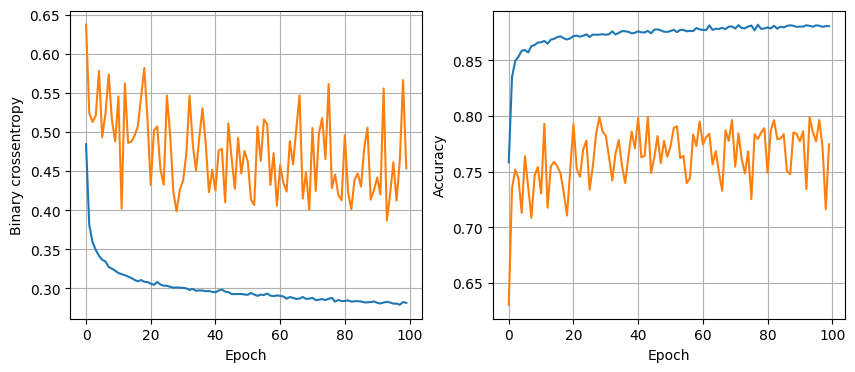

119/119 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.001, batch size 32


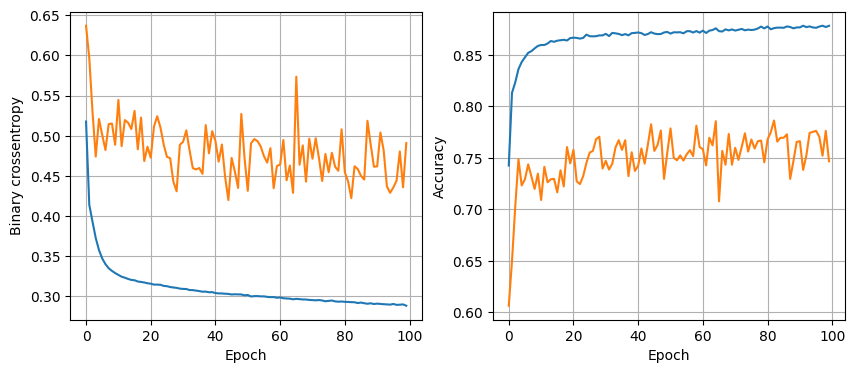

119/119 [==============================] - 1s 4ms/step - loss: 0.3159 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.001, batch size 64


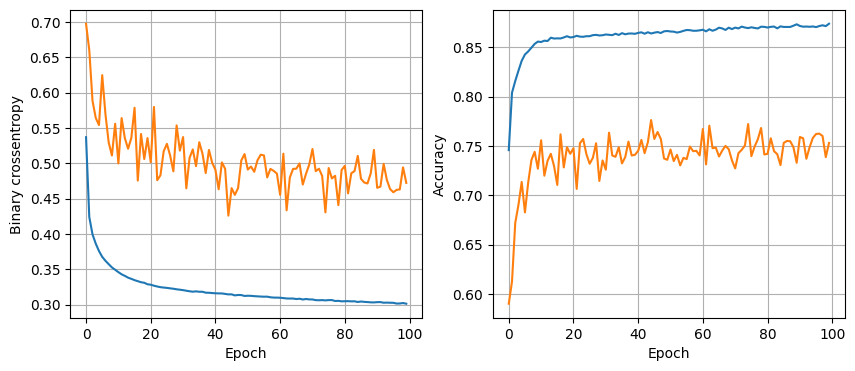

119/119 [==============================] - 1s 4ms/step - loss: 0.3118 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 128


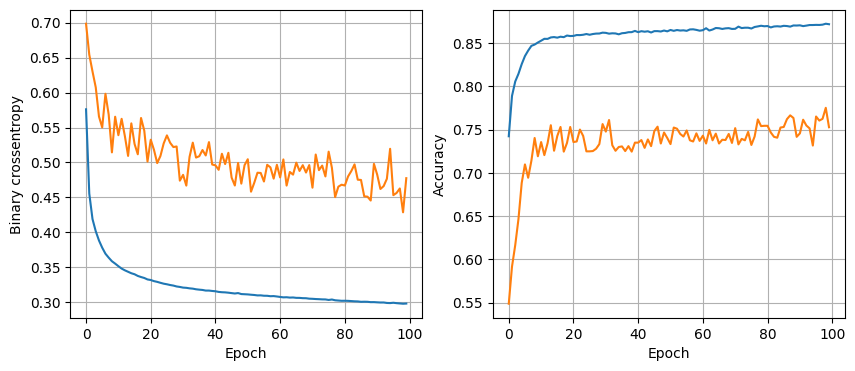

119/119 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.01, batch size 32


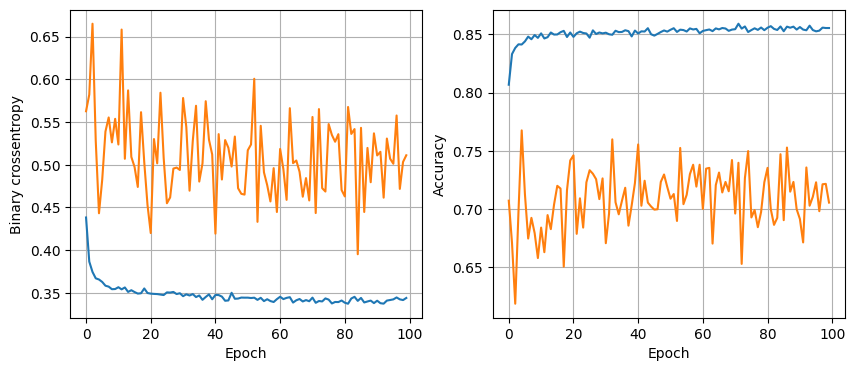

119/119 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8620
16 nodes, dropout 0.2, lr 0.01, batch size 64


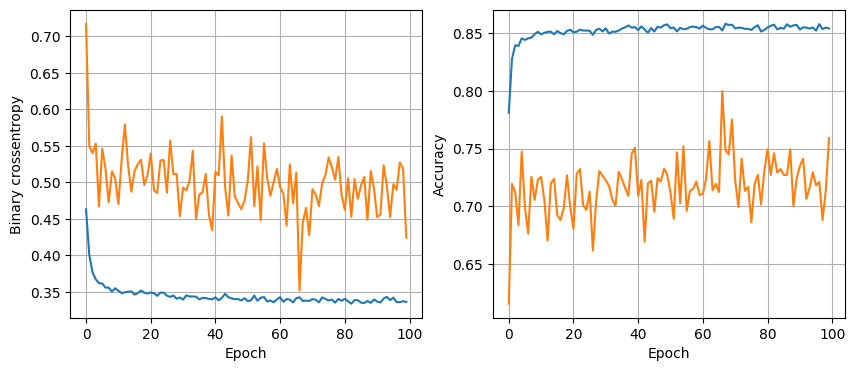

119/119 [==============================] - 1s 5ms/step - loss: 0.3283 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch size 128


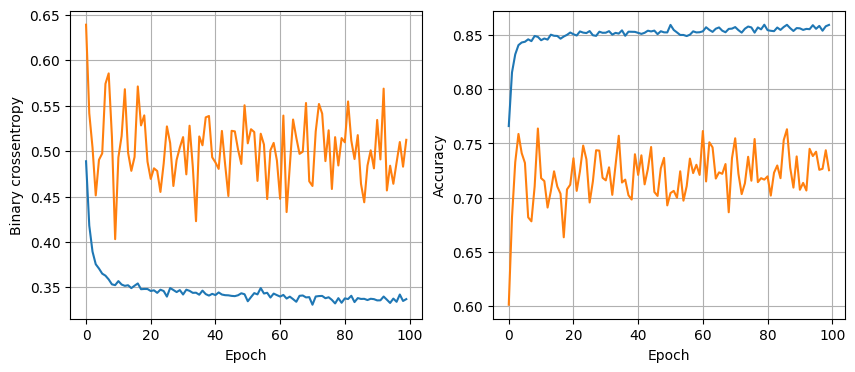

119/119 [==============================] - 1s 4ms/step - loss: 0.3272 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.005, batch size 32


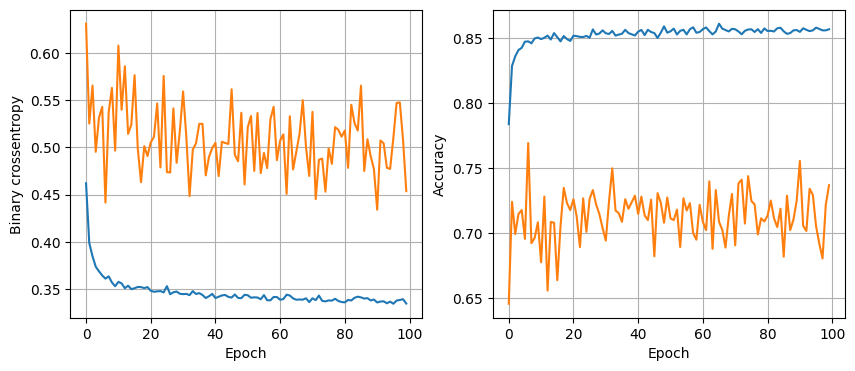

119/119 [==============================] - 1s 4ms/step - loss: 0.3121 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch size 64


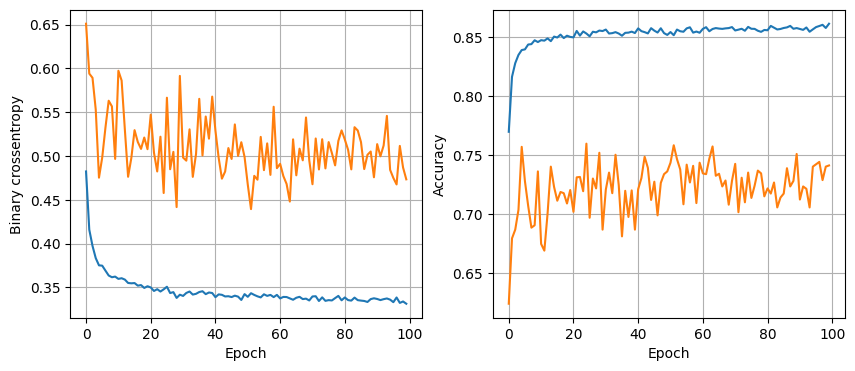

119/119 [==============================] - 1s 4ms/step - loss: 0.3214 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.005, batch size 128


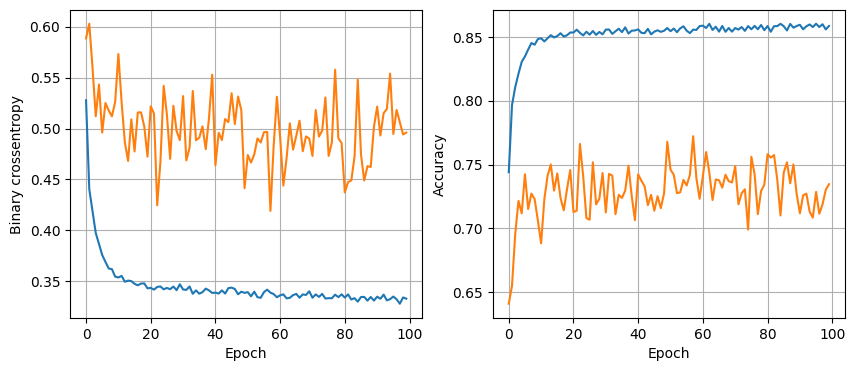

119/119 [==============================] - 1s 4ms/step - loss: 0.3193 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.001, batch size 32


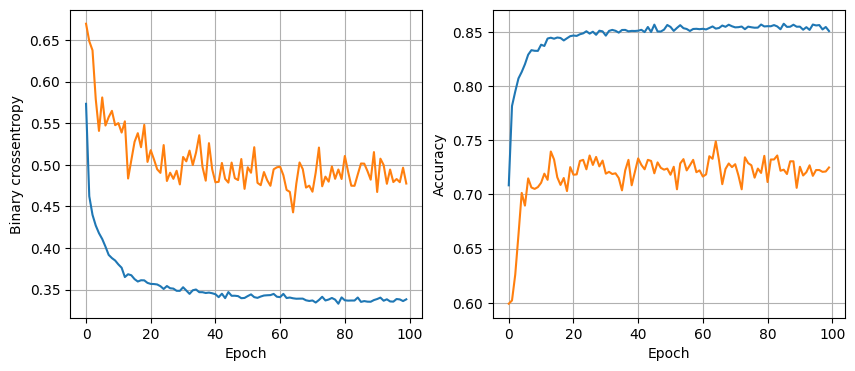

119/119 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.001, batch size 64


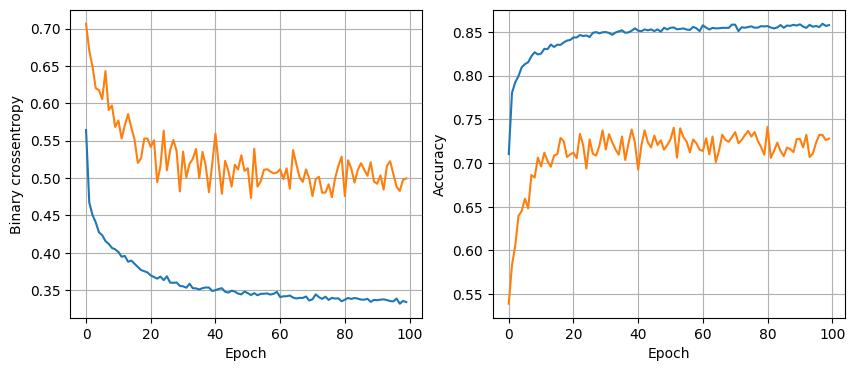

119/119 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.001, batch size 128


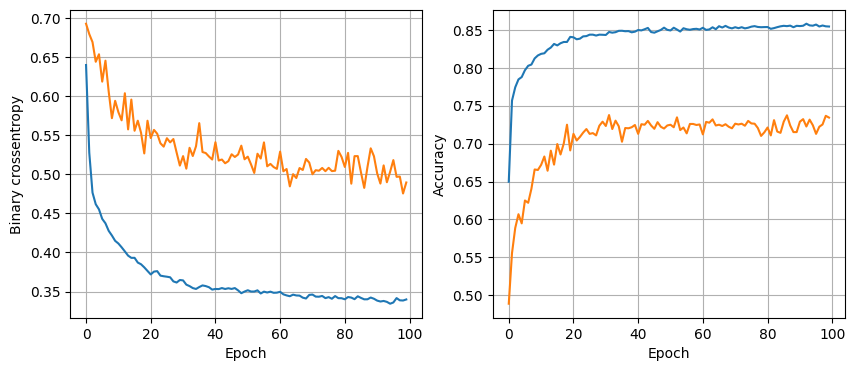

119/119 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.01, batch size 32


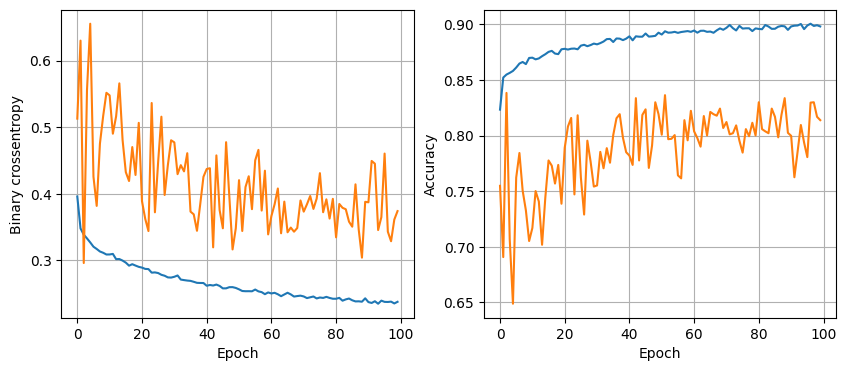

119/119 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8523
32 nodes, dropout 0, lr 0.01, batch size 64


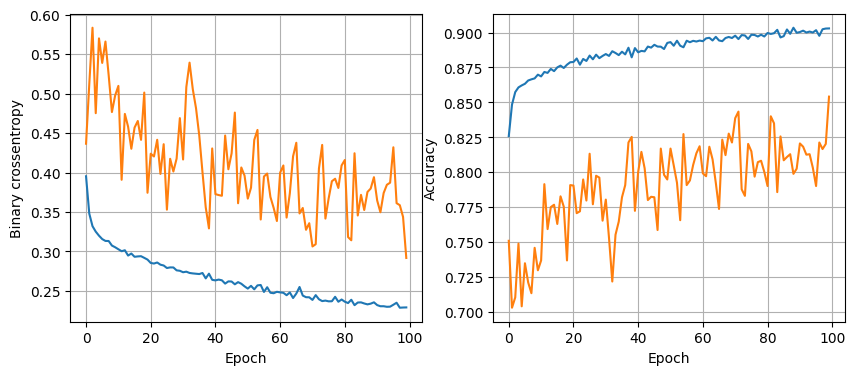

119/119 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.01, batch size 128


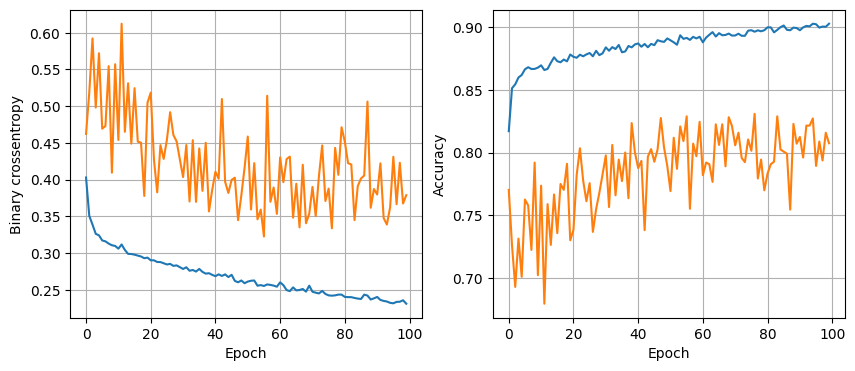

119/119 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.005, batch size 32


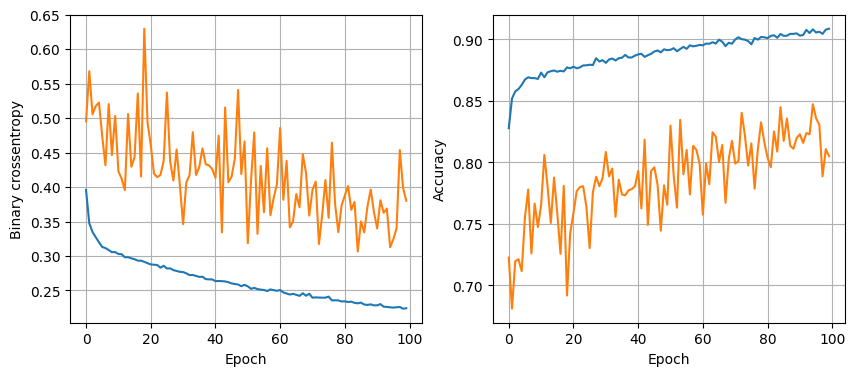

119/119 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.005, batch size 64


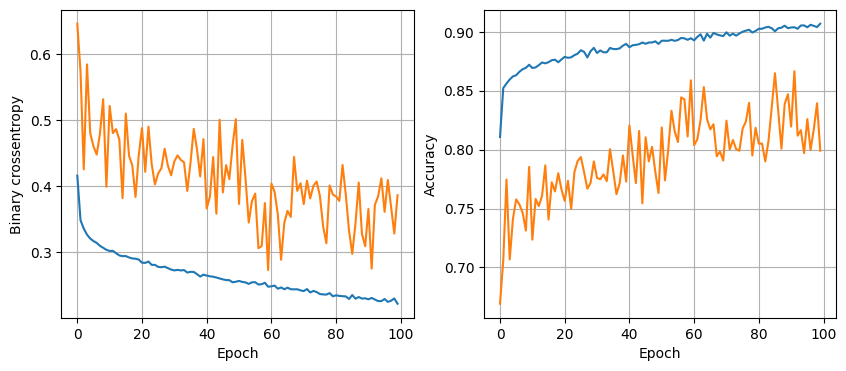

119/119 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8557
32 nodes, dropout 0, lr 0.005, batch size 128


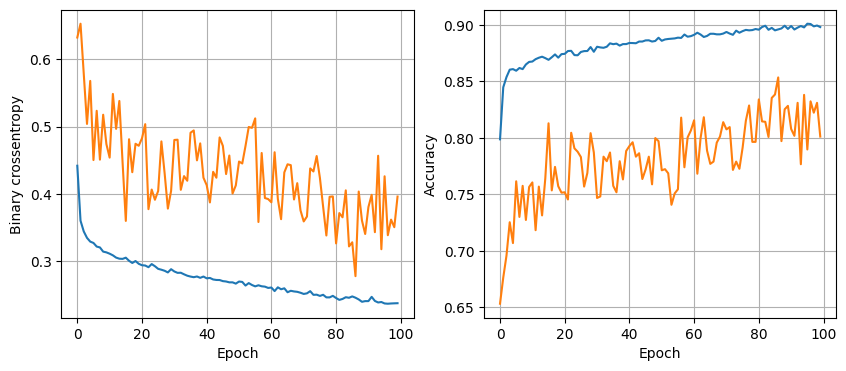

119/119 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.001, batch size 32


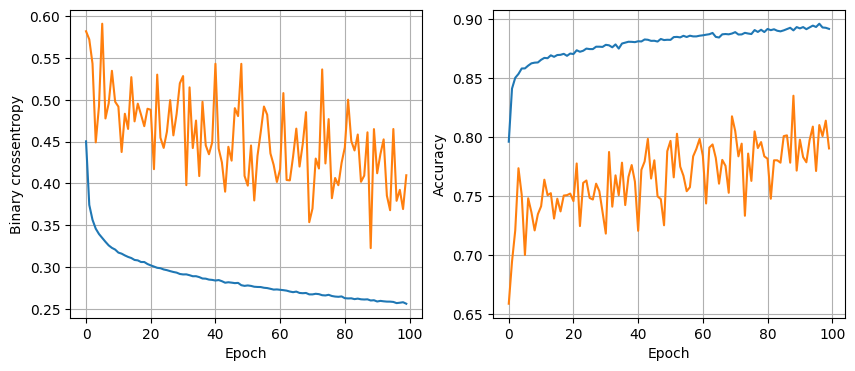

119/119 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 64


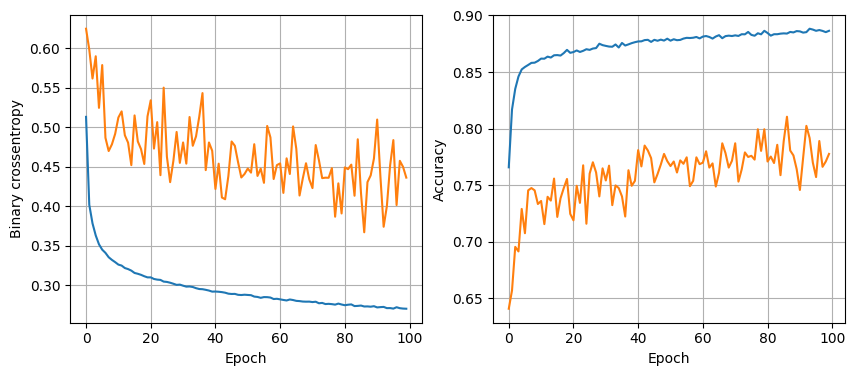

119/119 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 128


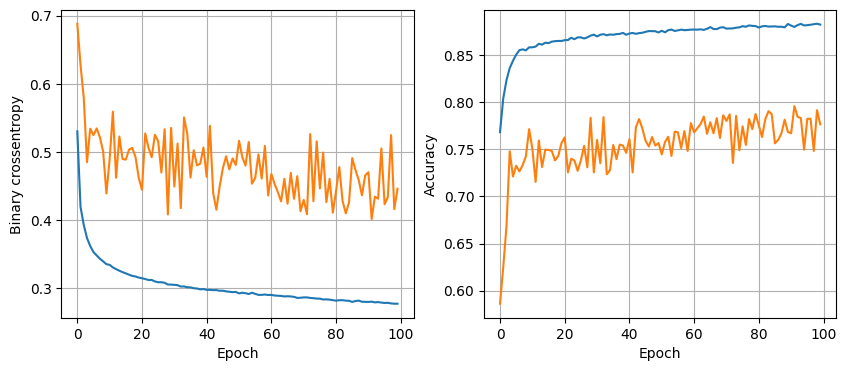

119/119 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 32


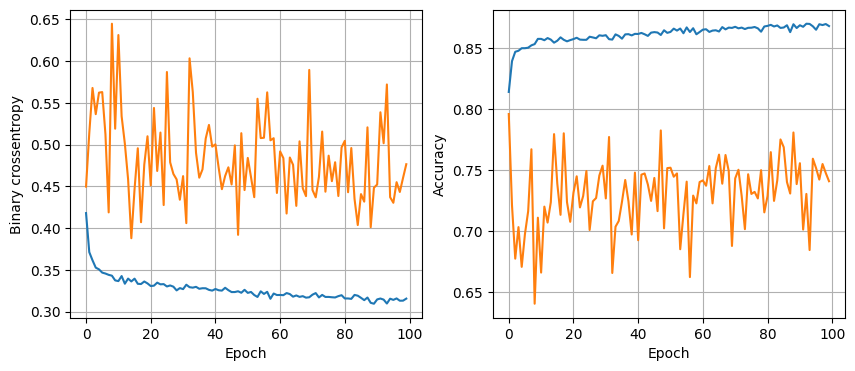

119/119 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8578
32 nodes, dropout 0.2, lr 0.01, batch size 64


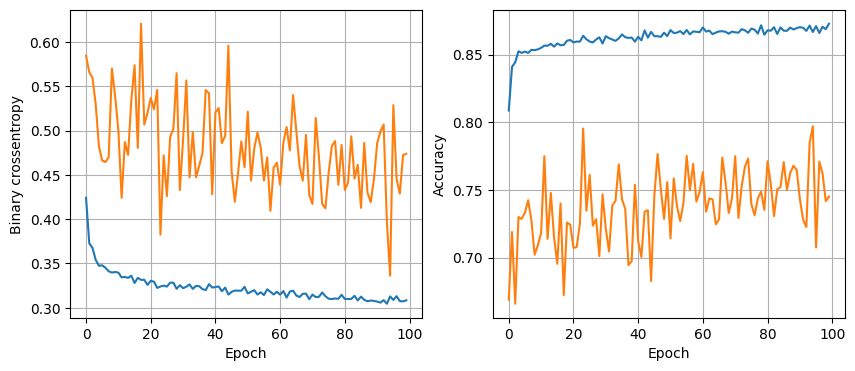

119/119 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.01, batch size 128


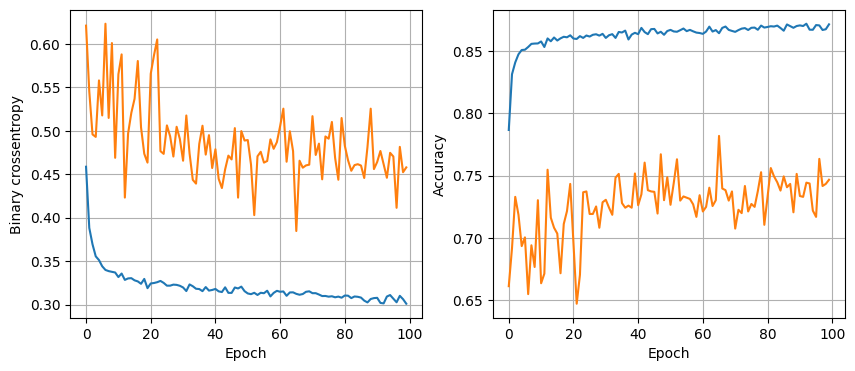

119/119 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8638
32 nodes, dropout 0.2, lr 0.005, batch size 32


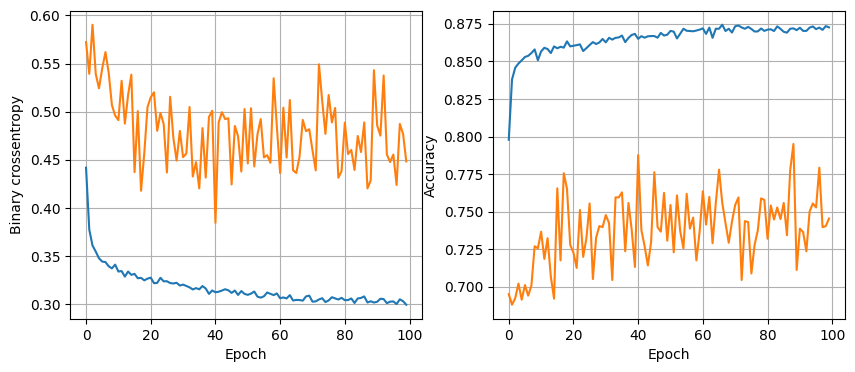

119/119 [==============================] - 0s 3ms/step - loss: 0.3110 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.005, batch size 64


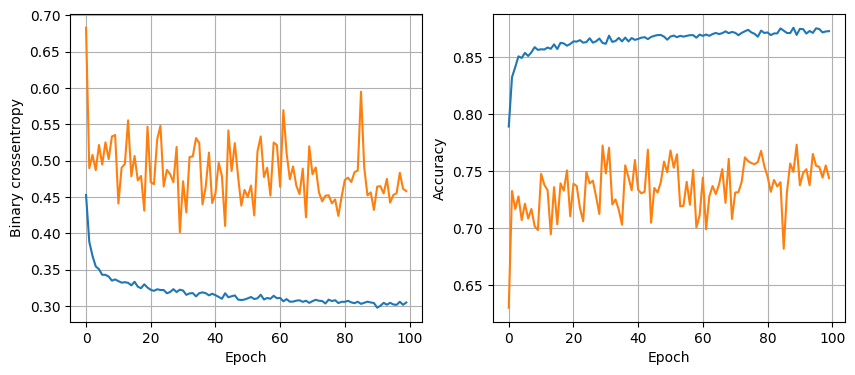

119/119 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.005, batch size 128


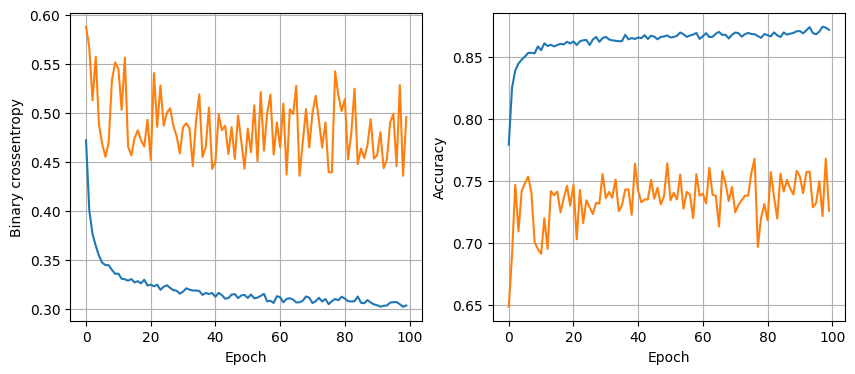

119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.001, batch size 32


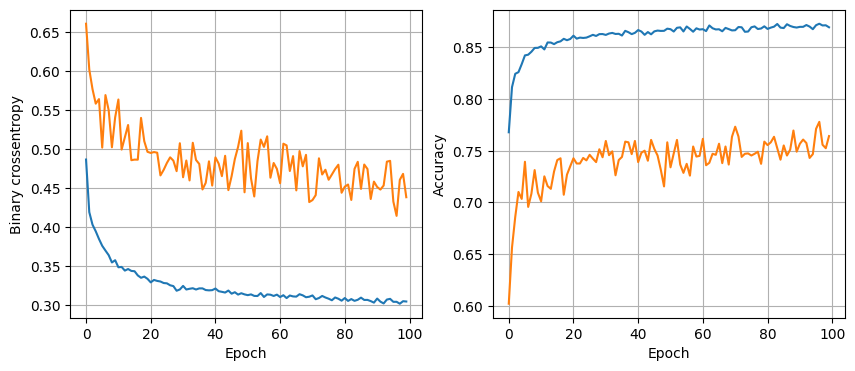

119/119 [==============================] - 1s 4ms/step - loss: 0.3135 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.001, batch size 64


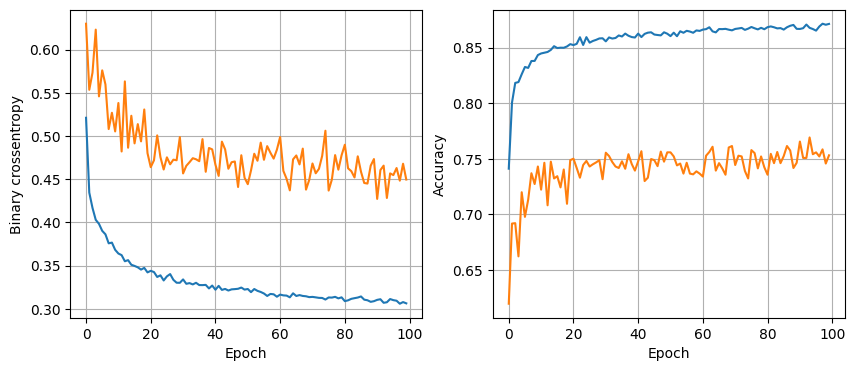

119/119 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.001, batch size 128


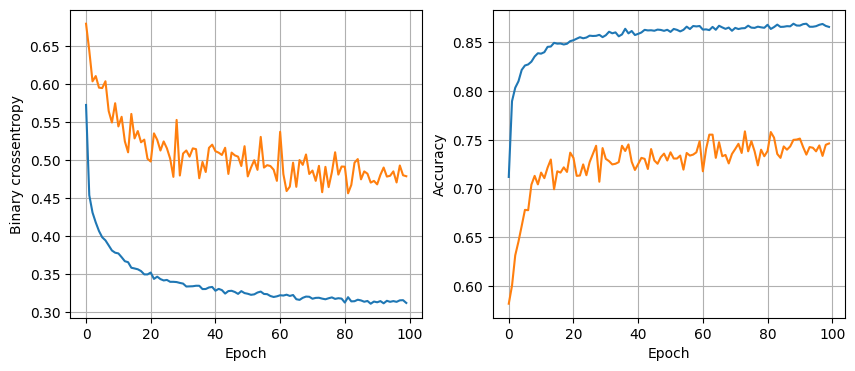

119/119 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.01, batch size 32


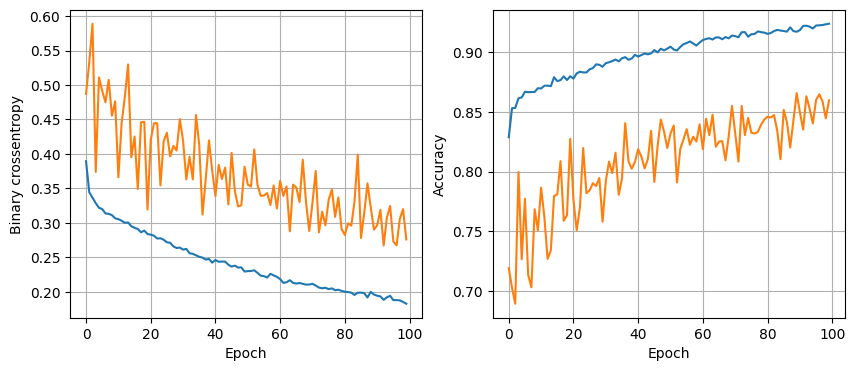

119/119 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.8615
64 nodes, dropout 0, lr 0.01, batch size 64


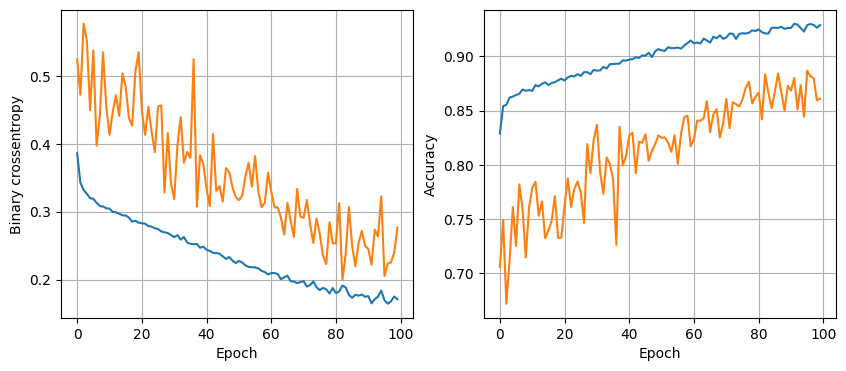

119/119 [==============================] - 1s 4ms/step - loss: 0.5936 - accuracy: 0.8496
64 nodes, dropout 0, lr 0.01, batch size 128


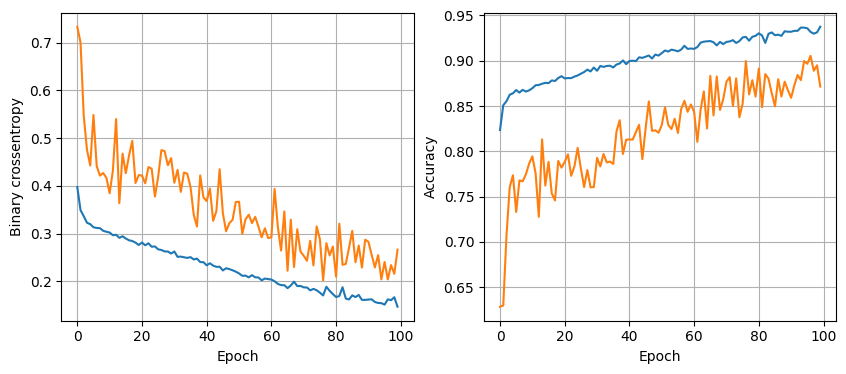

119/119 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.005, batch size 32


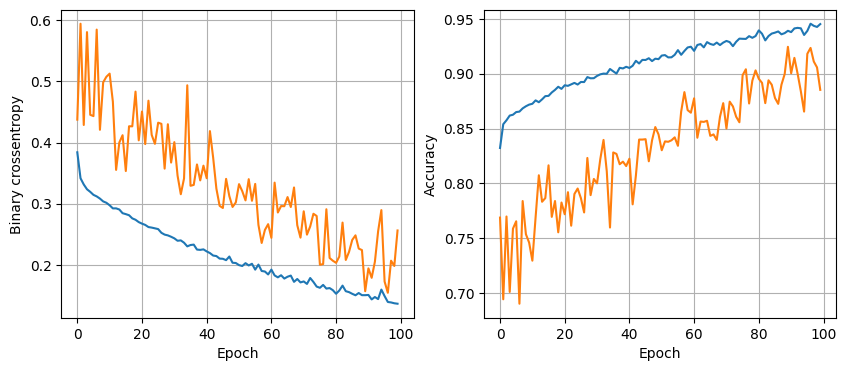

119/119 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.005, batch size 64


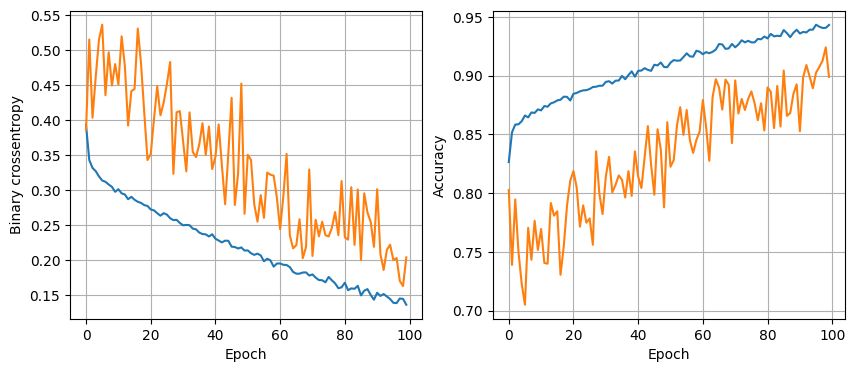

119/119 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 128


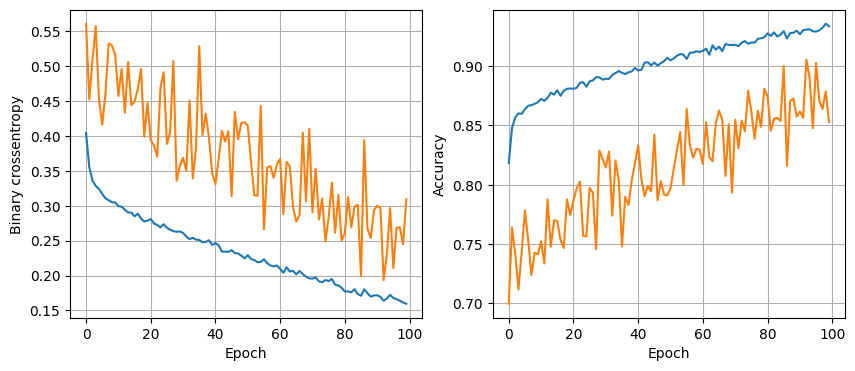

119/119 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.001, batch size 32


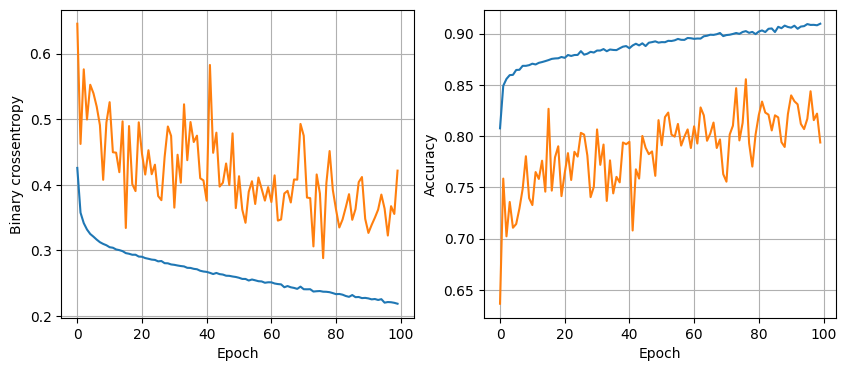

119/119 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.001, batch size 64


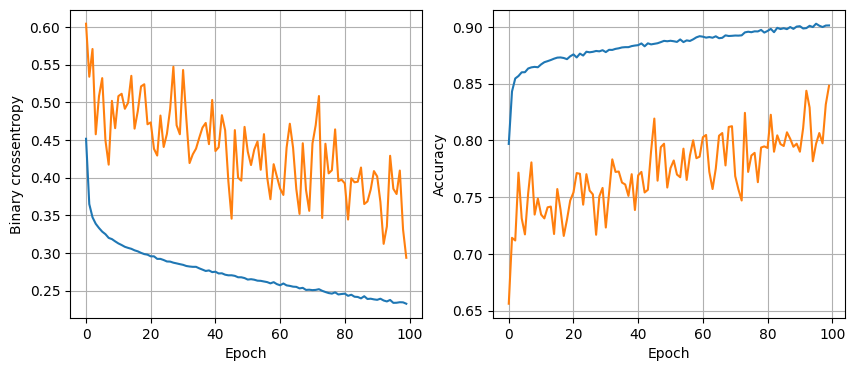

119/119 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 0.8636
64 nodes, dropout 0, lr 0.001, batch size 128


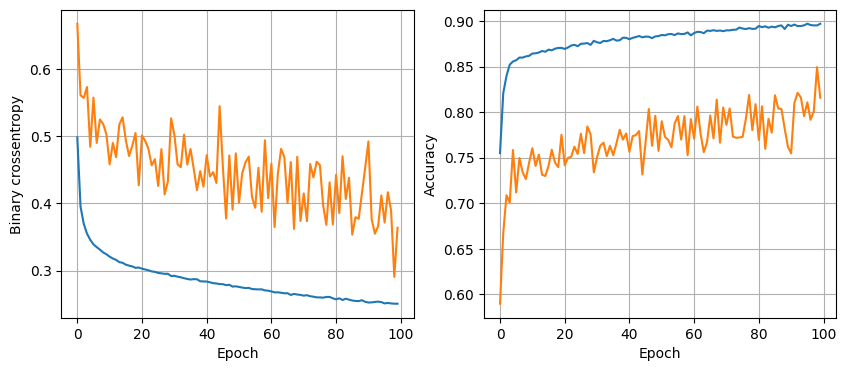

119/119 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.01, batch size 32


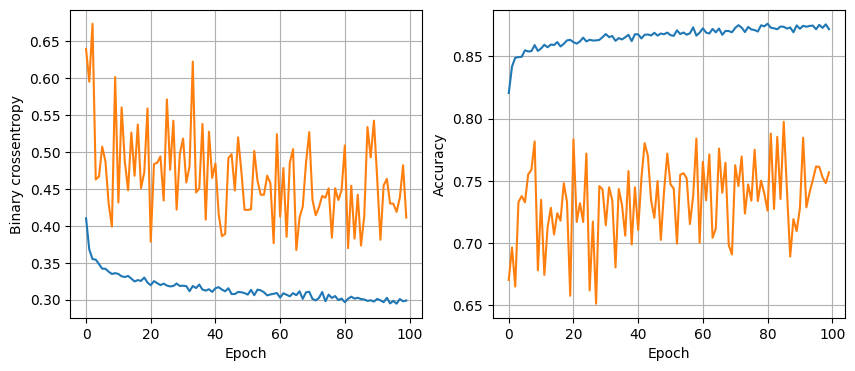

119/119 [==============================] - 1s 4ms/step - loss: 0.3134 - accuracy: 0.8688
64 nodes, dropout 0.2, lr 0.01, batch size 64


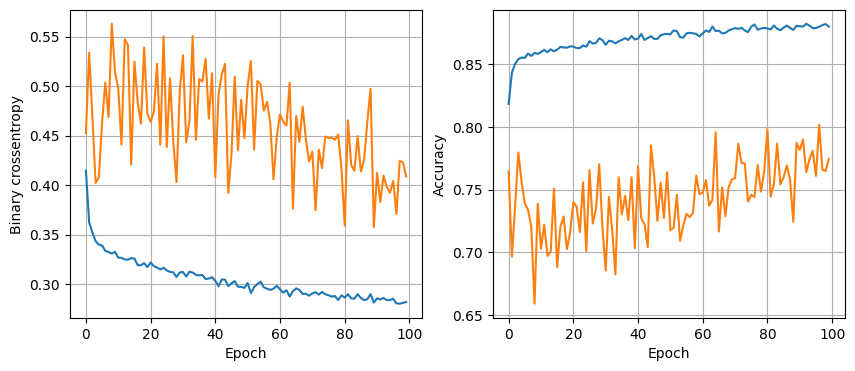

119/119 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.01, batch size 128


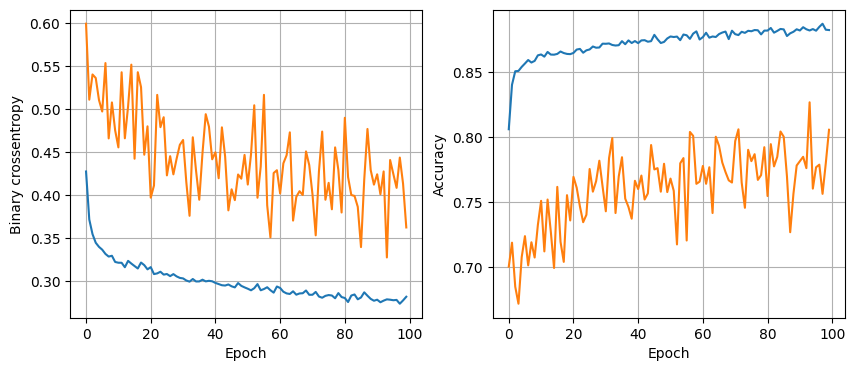

119/119 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.005, batch size 32


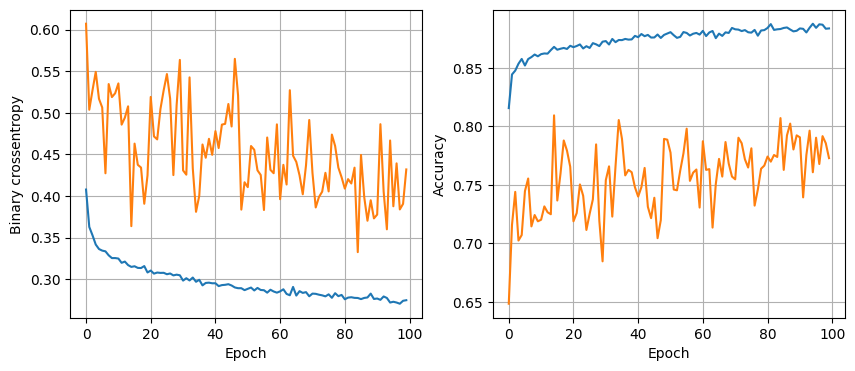

119/119 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.005, batch size 64


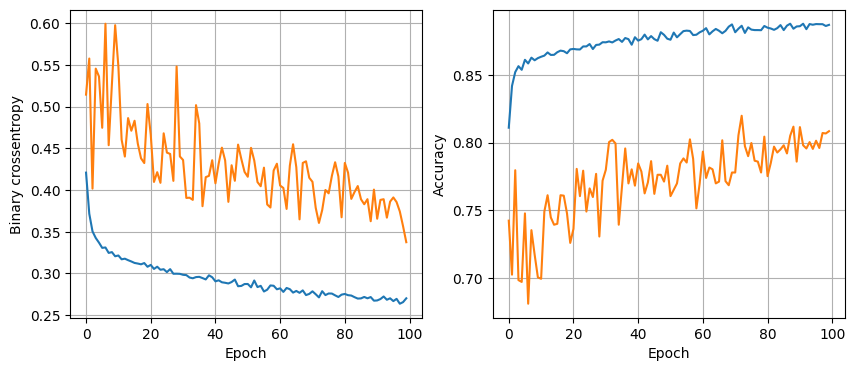

119/119 [==============================] - 0s 4ms/step - loss: 0.3201 - accuracy: 0.8672
64 nodes, dropout 0.2, lr 0.005, batch size 128


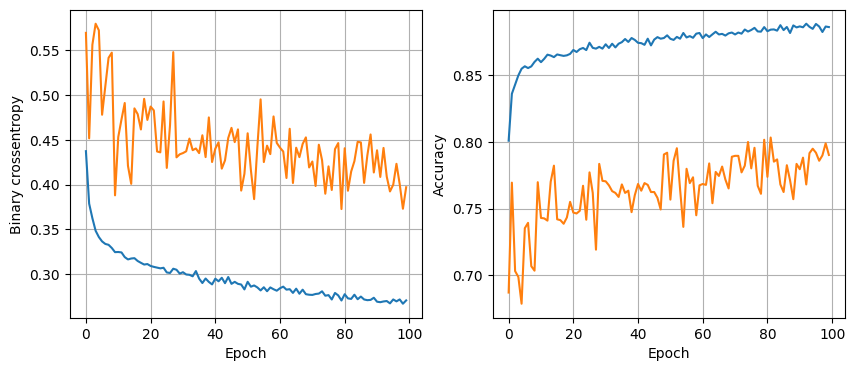

119/119 [==============================] - 0s 4ms/step - loss: 0.3225 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.001, batch size 32


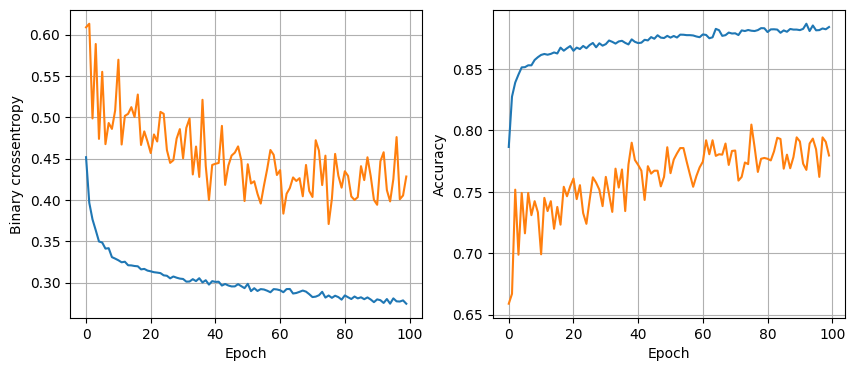

119/119 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.001, batch size 64


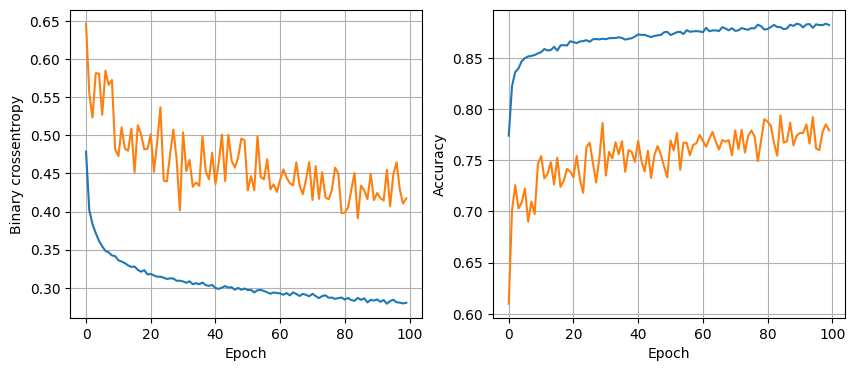

119/119 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.001, batch size 128


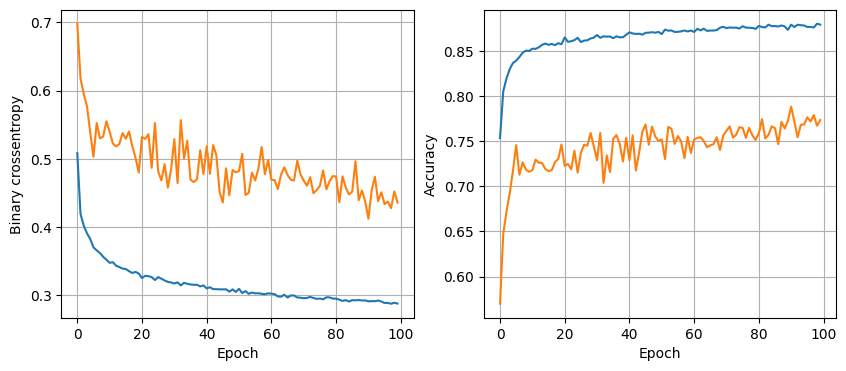

119/119 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8757


In [28]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [29]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 3ms/step


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1370
           1       0.87      0.95      0.91      2434

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

